# Natural Language Processing (Yelp Review)

In this NLP project, Yelp Reviews into 1 star or 5 star categories will be classified based off the text content in the reviews.

Dataset can be found at [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


## Imports Libraries


In [1]:
import numpy as np
import pandas as pd

## The Data

**Reading the yelp.csv file and set it as a dataframe called df.**

In [2]:
df = pd.read_csv('yelp.csv')

**Checking the head,info,and describe methods on yelp.**

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
df['text length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Exploratory Data Analysis



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

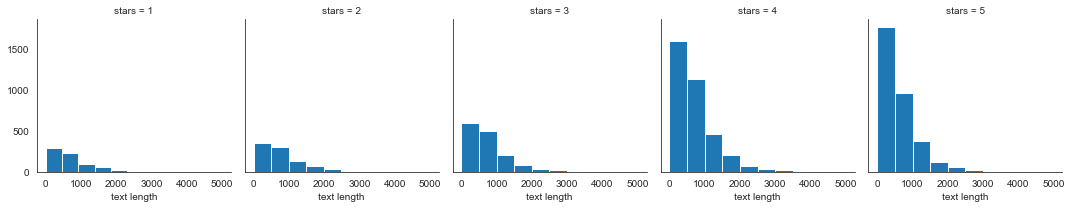

In [8]:
grid = sns.FacetGrid(df,col='stars')
grid.map(plt.hist,'text length');

**Create a boxplot of text length for each star category.**

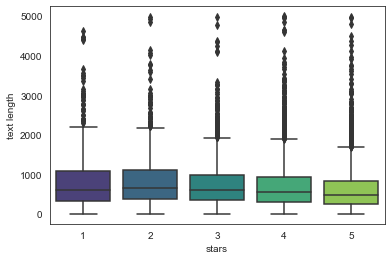

In [9]:
sns.boxplot(x='stars',y='text length',data=df,palette='viridis');

**Create a countplot of the number of occurrences for each type of star rating.**

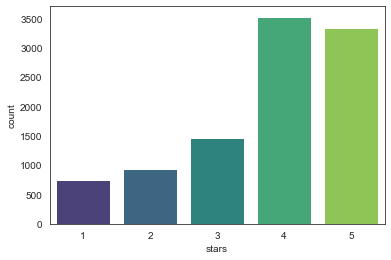

In [10]:
sns.countplot(x='stars',data=df,palette='viridis');

**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [11]:
mean_numeric = df.groupby('stars').mean()
mean_numeric

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Looking at the correlations between numerical variables**

In [12]:
mean_numeric.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

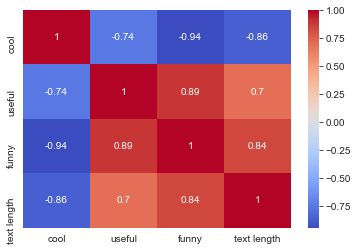

In [13]:
sns.heatmap(mean_numeric.corr(),cmap='coolwarm',annot=True);

## NLP Classification 

Only grab reviews that were either 1 star or 5 stars.

**Create a dataframe that contains the columns of dataframe but for only the 1 or 5 star reviews.**

In [32]:
class_1_or_5 = df[(df.stars==1) | (df.stars==5)]
class_1_or_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


**X will be the 'text' column of our dataframe (Features) and y will be the 'stars' column of our dataframe (Labels).**

In [33]:
X = class_1_or_5['text']
y = class_1_or_5['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [35]:
X = cv.fit_transform(X)

## Train Test Split


**Use train_test_split to split up the data into X_train, X_test, y_train, y_test.**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

**Import MultinomialNB and create an instance of the estimator and call is nb**

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [38]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations


**Use the predict method off of nb to predict labels from X_test.**

In [39]:
y_pred = nb.predict(X_test)

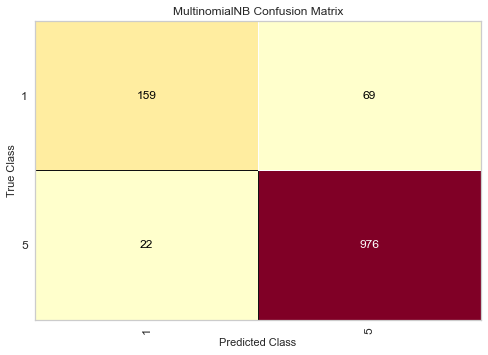

In [40]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(nb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

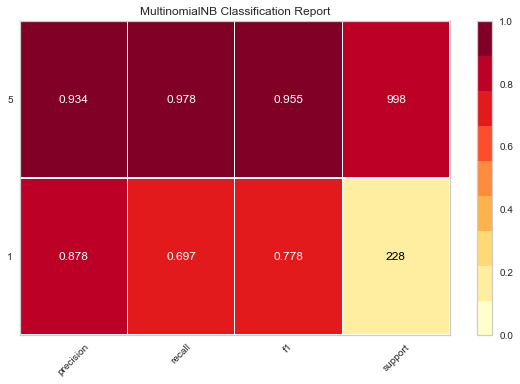

In [41]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(nb, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

## Text Processing with Pipeline
***(CountVectorizer(),TfidfTransformer(),and MultinomialNB())***


**Import TfidfTransformer from sklearn.**

In [42]:
from sklearn.feature_extraction.text import  TfidfTransformer

**Import Pipeline from sklearn.**

In [43]:
from sklearn.pipeline import Pipeline

**Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [26]:
pipeline = Pipeline([('bow', CountVectorizer()),('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

### Train Test Split

**Redo the train test split.**

In [58]:
X = class_1_or_5['text']
y = class_1_or_5['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [60]:
y_pred = pipeline.predict(X_test)

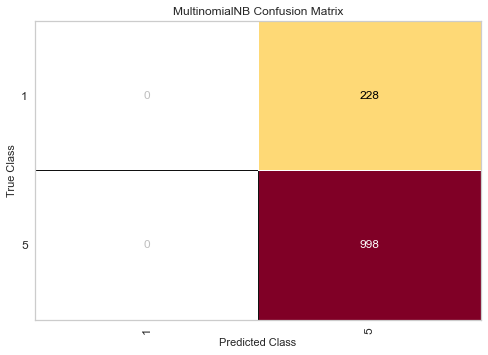

In [61]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(pipeline)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

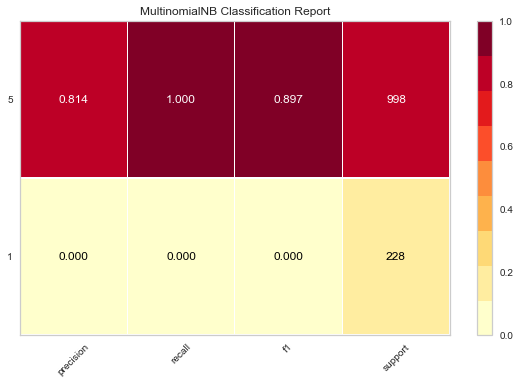

In [62]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(pipeline, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

## Text Processing with Pipeline  (Random Forests Classifier)
***(CountVectorizer() and RandomForestClassifieer())***

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipeline_rf = Pipeline([('bow', CountVectorizer()), ('classifier', RandomForestClassifier())])

In [65]:
pipeline_rf.fit(X_train,y_train)
y_pred = pipeline_rf.predict(X_test)

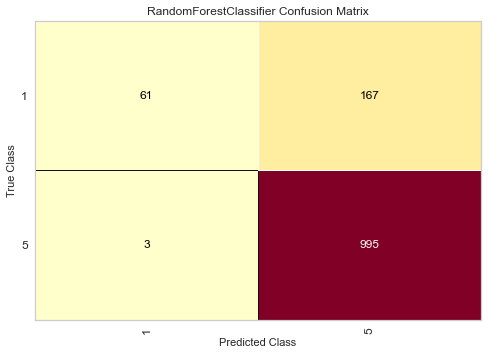

In [66]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(pipeline_rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

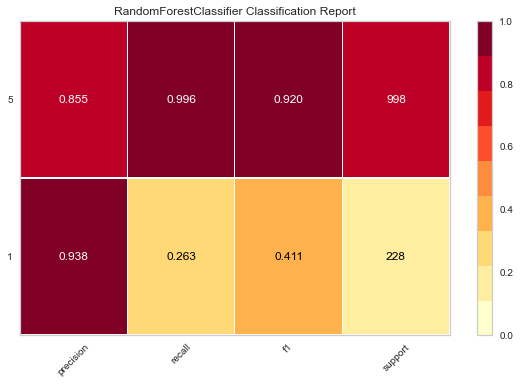

In [67]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(pipeline_rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

## Text Processing with Pipeline  (Decision Tree Classifier)
***(CountVectorizer() and DecisionTreeClassifier())***

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
pipeline_dt = Pipeline([('bow', CountVectorizer()), ('classifier', DecisionTreeClassifier())])

In [69]:
pipeline_dt.fit(X_train,y_train)
y_pred = pipeline_dt.predict(X_test)

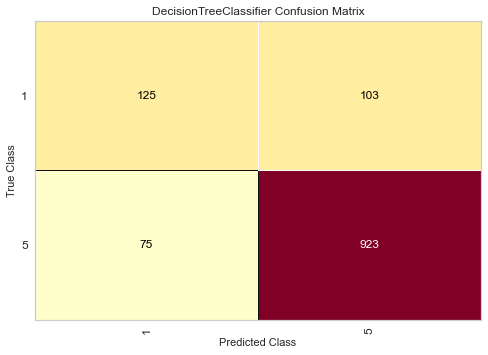

In [70]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(pipeline_dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

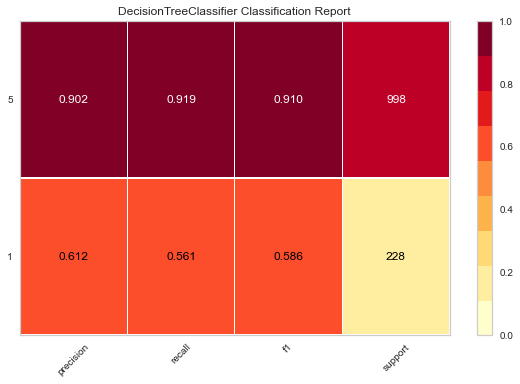

In [71]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(pipeline_dt, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();